In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Understanding the data

In [3]:
data = pd.read_csv("metropt3_data.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1516948 non-null  int64  
 1   timestamp        1516948 non-null  object 
 2   TP2              1516948 non-null  float64
 3   TP3              1516948 non-null  float64
 4   H1               1516948 non-null  float64
 5   DV_pressure      1516948 non-null  float64
 6   Reservoirs       1516948 non-null  float64
 7   Oil_temperature  1516948 non-null  float64
 8   Motor_current    1516948 non-null  float64
 9   COMP             1516948 non-null  float64
 10  DV_eletric       1516948 non-null  float64
 11  Towers           1516948 non-null  float64
 12  MPG              1516948 non-null  float64
 13  LPS              1516948 non-null  float64
 14  Pressure_switch  1516948 non-null  float64
 15  Oil_level        1516948 non-null  float64
 16  Caudal_impulses  1

In [8]:
print(data.describe().round(2))
print(data.columns)

        Unnamed: 0         TP2         TP3          H1  DV_pressure  \
count   1516948.00  1516948.00  1516948.00  1516948.00   1516948.00   
mean    7584735.00        1.37        8.98        7.57         0.06   
std     4379053.12        3.25        0.64        3.33         0.38   
min           0.00       -0.03        0.73       -0.04        -0.03   
25%     3792367.50       -0.01        8.49        8.25        -0.02   
50%     7584735.00       -0.01        8.96        8.78        -0.02   
75%    11377102.50       -0.01        9.49        9.37        -0.02   
max    15169470.00       10.68       10.30       10.29         9.84   

       Reservoirs  Oil_temperature  Motor_current        COMP  DV_eletric  \
count  1516948.00       1516948.00     1516948.00  1516948.00  1516948.00   
mean         8.99            62.64           2.05        0.84        0.16   
std          0.64             6.52           2.30        0.37        0.37   
min          0.71            15.40           0.02   

In [9]:
print(data.head(10))

   Unnamed: 0            timestamp    TP2    TP3     H1  DV_pressure  \
0           0  2020-02-01 00:00:00 -0.012  9.358  9.340       -0.024   
1          10  2020-02-01 00:00:10 -0.014  9.348  9.332       -0.022   
2          20  2020-02-01 00:00:19 -0.012  9.338  9.322       -0.022   
3          30  2020-02-01 00:00:29 -0.012  9.328  9.312       -0.022   
4          40  2020-02-01 00:00:39 -0.012  9.318  9.302       -0.022   
5          50  2020-02-01 00:00:49 -0.012  9.306  9.290       -0.024   
6          60  2020-02-01 00:00:59 -0.012  9.296  9.280       -0.024   
7          70  2020-02-01 00:01:09 -0.014  9.286  9.270       -0.024   
8          80  2020-02-01 00:01:19 -0.012  9.276  9.258       -0.022   
9          90  2020-02-01 00:01:29 -0.012  9.264  9.248       -0.022   

   Reservoirs  Oil_temperature  Motor_current  COMP  DV_eletric  Towers  MPG  \
0       9.358           53.600         0.0400   1.0         0.0     1.0  1.0   
1       9.348           53.675         0.0400  

## Dropping the first column

In [ ]:
data = data.drop("Unnamed: 0", axis=1)

In [14]:
print(data.columns)

Index(['timestamp', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
       'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric', 'Towers',
       'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses'],
      dtype='object')


## Converting timestamp to pd.datetime 
We are converting th datatype of timestamp column of our dataset ,which was initially "string", to Pandas Datetime object to use the timestamp columns for time-series based computations

In [15]:
import datetime

In [16]:
print(f"Data type of timestamp is {type(data.timestamp[0])}")

Data type of timestamp is <class 'str'>


In [20]:
data["timestamp"] = data["timestamp"].apply(pd.to_datetime, format = "%Y-%m-%d %H:%M:%S")
print(f"New data type of timestamp is {type(data.timestamp[0])}")

New data type of timestamp is <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [21]:
print(data.head(5))

            timestamp    TP2    TP3     H1  DV_pressure  Reservoirs  \
0 2020-02-01 00:00:00 -0.012  9.358  9.340       -0.024       9.358   
1 2020-02-01 00:00:10 -0.014  9.348  9.332       -0.022       9.348   
2 2020-02-01 00:00:19 -0.012  9.338  9.322       -0.022       9.338   
3 2020-02-01 00:00:29 -0.012  9.328  9.312       -0.022       9.328   
4 2020-02-01 00:00:39 -0.012  9.318  9.302       -0.022       9.318   

   Oil_temperature  Motor_current  COMP  DV_eletric  Towers  MPG  LPS  \
0           53.600         0.0400   1.0         0.0     1.0  1.0  0.0   
1           53.675         0.0400   1.0         0.0     1.0  1.0  0.0   
2           53.600         0.0425   1.0         0.0     1.0  1.0  0.0   
3           53.425         0.0400   1.0         0.0     1.0  1.0  0.0   
4           53.475         0.0400   1.0         0.0     1.0  1.0  0.0   

   Pressure_switch  Oil_level  Caudal_impulses  
0              1.0        1.0              1.0  
1              1.0        1.0       

## Labelling
We append a 'status' column to the dataset in order to label the tuples for failure (1) or no failure(0)

In [22]:
labeled_data = data.copy()

In [23]:
labeled_data['status'] = 0 

In [24]:
print(labeled_data.head(5))

            timestamp    TP2    TP3     H1  DV_pressure  Reservoirs  \
0 2020-02-01 00:00:00 -0.012  9.358  9.340       -0.024       9.358   
1 2020-02-01 00:00:10 -0.014  9.348  9.332       -0.022       9.348   
2 2020-02-01 00:00:19 -0.012  9.338  9.322       -0.022       9.338   
3 2020-02-01 00:00:29 -0.012  9.328  9.312       -0.022       9.328   
4 2020-02-01 00:00:39 -0.012  9.318  9.302       -0.022       9.318   

   Oil_temperature  Motor_current  COMP  DV_eletric  Towers  MPG  LPS  \
0           53.600         0.0400   1.0         0.0     1.0  1.0  0.0   
1           53.675         0.0400   1.0         0.0     1.0  1.0  0.0   
2           53.600         0.0425   1.0         0.0     1.0  1.0  0.0   
3           53.425         0.0400   1.0         0.0     1.0  1.0  0.0   
4           53.475         0.0400   1.0         0.0     1.0  1.0  0.0   

   Pressure_switch  Oil_level  Caudal_impulses  status  
0              1.0        1.0              1.0       0  
1              1.0  

### Failure is judged and set to 1 according to time from given table
All the tuples with timestamps falling within the start and end times are labelled as failures

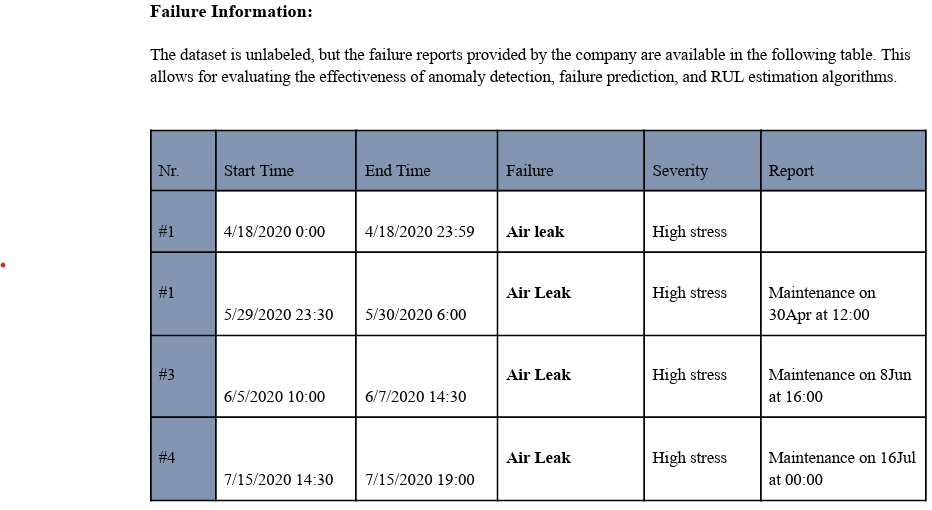

In [26]:
def to_datetime(xs):
    result = []
    format = "%Y-%m-%d %H:%M:%S"
    for x in xs:
        result.append(pd.to_datetime(x,format = format))
    return result

failure_start = to_datetime(["2020-04-18 00:00:00", "2020-05-29 23:30:00", "2020-06-05 10:00:00", "2020-07-15 14:30:00"])
failure_end  = to_datetime(["2020-04-18 23:59:00", "2020-05-30 06:00:00", "2020-06-07 14:30:00", "2020-07-15 19:00:00"])

In [27]:
def in_between(x,start,end):
    start_con = x>=start
    end_con = x<=end
    inbetween_con = start_con and end_con
    if inbetween_con:
        return 1
    else:
        return 0

failure_indx = []
import numpy as np
for i,(start_tim, end_tim) in enumerate(zip(failure_start,failure_end)):
    mask = labeled_data['timestamp'].apply(in_between, start=start_tim, end=end_tim)
    indx = labeled_data.index[mask==True].tolist()
    failure_indx+=indx
print(f" Found {len(failure_indx)} samples representing failure state")

 Found 29954 samples representing failure state


In [30]:
labeled_data['status'].iloc[failure_indx] = 1

C:\Users\singh\AppData\Local\Temp\ipykernel_41464\1355913851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled_data['status'].iloc[failure_indx] = 1


In [33]:
print(f"Example of Failure state \n {labeled_data[labeled_data['status']==1].head(3)}")

Example of Failure state 
                  timestamp    TP2    TP3     H1  DV_pressure  Reservoirs  \
562564 2020-04-18 00:00:01 -0.018  8.248  8.238       -0.024       8.248   
562565 2020-04-18 00:00:13 -0.018  8.248  8.238       -0.024       8.248   
562566 2020-04-18 00:00:24 -0.018  8.248  8.238       -0.024       8.248   

        Oil_temperature  Motor_current  COMP  DV_eletric  Towers  MPG  LPS  \
562564            49.45           0.04   1.0         0.0     1.0  1.0  0.0   
562565            49.45           0.04   1.0         0.0     1.0  1.0  0.0   
562566            49.45           0.04   1.0         0.0     1.0  1.0  0.0   

        Pressure_switch  Oil_level  Caudal_impulses  status  
562564              1.0        1.0              1.0       1  
562565              1.0        1.0              1.0       1  
562566              1.0        1.0              1.0       1  


### Analysing imbalances in Data

In [35]:
#seperating the failures
pos_data = labeled_data[labeled_data['status']==1]
neg_data = labeled_data[labeled_data['status']==0]

In [36]:
 print(f"Positive dataset\n {pos_data.info()}\n")
 print(f"Negative dataset\n {neg_data.info()}\n")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29954 entries, 562564 to 1172714
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        29954 non-null  datetime64[ns]
 1   TP2              29954 non-null  float64       
 2   TP3              29954 non-null  float64       
 3   H1               29954 non-null  float64       
 4   DV_pressure      29954 non-null  float64       
 5   Reservoirs       29954 non-null  float64       
 6   Oil_temperature  29954 non-null  float64       
 7   Motor_current    29954 non-null  float64       
 8   COMP             29954 non-null  float64       
 9   DV_eletric       29954 non-null  float64       
 10  Towers           29954 non-null  float64       
 11  MPG              29954 non-null  float64       
 12  LPS              29954 non-null  float64       
 13  Pressure_switch  29954 non-null  float64       
 14  Oil_level        29954 non-null

We have 29954 cases of failures and 1486994 cases of no failures, hence 50x more negative samples which is highly imbalancesd. Hence we sample out same number of samples from the negative data

In [37]:
n_positives = int(pos_data['status'].count())
sub_neg_data = neg_data.sample(n_positives, random_state = 42)
print(f"Negative dataset after subsampling {sub_neg_data.info()}")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29954 entries, 1306134 to 1276653
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        29954 non-null  datetime64[ns]
 1   TP2              29954 non-null  float64       
 2   TP3              29954 non-null  float64       
 3   H1               29954 non-null  float64       
 4   DV_pressure      29954 non-null  float64       
 5   Reservoirs       29954 non-null  float64       
 6   Oil_temperature  29954 non-null  float64       
 7   Motor_current    29954 non-null  float64       
 8   COMP             29954 non-null  float64       
 9   DV_eletric       29954 non-null  float64       
 10  Towers           29954 non-null  float64       
 11  MPG              29954 non-null  float64       
 12  LPS              29954 non-null  float64       
 13  Pressure_switch  29954 non-null  float64       
 14  Oil_level        29954 non-nul

In [38]:
merged_data = pd.concat([pos_data, sub_neg_data], axis = 0)

## Outliers
We use IQR method to detect and drop any outliers from each feature

In [42]:
def investigate_outliers(data,c):
    q1 = data[c].quantile(0.25)
    q3 = data[c].quantile(0.75)
    iqr = q3-q1
    ll=q1-1.5*iqr
    ul=q3+1.5*iqr
    num_outliers = data[data[c]<ll][c].count() + data[data[c]>ul][c].count()
    if num_outliers>0:
        print(f"Found {num_outliers} oulier(s) for feature {c}")
    return {'col': c, 'n_outliers': num_outliers, 'll': ll, 'ul': ul, 'q1': q1, 'q3':q3}

clean_data = merged_data.copy()
for i in range(5):
    for c in clean_data.columns:
        if c not in ["Unnamed: 0", "timestamp"]:
            cue = investigate_outliers(clean_data,c)
            if cue["n_outliers"]>0 and (cue["q1"] != cue["q3"]):
                print(f"Dropping {cue['n_outliers']} from column {c}")
                clean_data = clean_data[clean_data[c]>cue["ll"]]
                clean_data = clean_data[clean_data[c]<cue["ul"]]
                print(f"{clean_data.shape[0]} samples left\n")
            elif (cue["q1"]== cue["q3"]):
                print("Skipping .. data has Q1 equals to Q3")
                print(f"{clean_data.shape[0]} rows left\n")
            

for c in clean_data.columns:
    if c not in ["Unnamed:0", "timestamp", "COMP", 'status']:
        cue = investigate_outliers(clean_data,c)
                


Found 424 oulier(s) for feature TP3
Dropping 424 from column TP3
59484 samples left

Found 5 oulier(s) for feature DV_pressure
Dropping 5 from column DV_pressure
59479 samples left

Found 3 oulier(s) for feature Reservoirs
Dropping 3 from column Reservoirs
59476 samples left

Found 29 oulier(s) for feature Oil_temperature
Dropping 29 from column Oil_temperature
59447 samples left

Found 395 oulier(s) for feature LPS
Skipping .. data has Q1 equals to Q3
59447 rows left

Found 402 oulier(s) for feature Pressure_switch
Skipping .. data has Q1 equals to Q3
59447 rows left

Found 2897 oulier(s) for feature Oil_level
Skipping .. data has Q1 equals to Q3
59447 rows left

Found 1948 oulier(s) for feature Caudal_impulses
Skipping .. data has Q1 equals to Q3
59447 rows left

Found 2 oulier(s) for feature Oil_temperature
Dropping 2 from column Oil_temperature
59445 samples left

Found 395 oulier(s) for feature LPS
Skipping .. data has Q1 equals to Q3
59445 rows left

Found 402 oulier(s) for featu

In [43]:
#Investigate the columns with binary values
binary_cols = ['LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']
clean_data[binary_cols] = clean_data[binary_cols].apply(np.round)

# Exploratory Data  Analysis 
## 1) Correlation

In [44]:
clean_data.corr().round(2)

C:\Users\singh\AppData\Local\Temp\ipykernel_41464\386904710.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  clean_data.corr().round(2)


,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,status
TP2,1.00,-0.42,-0.98,0.81,-0.42,0.74,0.87,-0.98,0.98,-0.52,-0.97,0.06,0.00,0.19,0.14,0.83
TP3,-0.42,1.00,0.54,-0.55,1.00,-0.28,-0.17,0.49,-0.48,0.27,0.48,-0.18,0.01,-0.14,-0.13,-0.55
H1,-0.98,0.54,1.00,-0.83,0.54,-0.73,-0.84,0.99,-0.99,0.54,0.99,-0.07,0.01,-0.20,-0.15,-0.86
DV_pressure,0.81,-0.55,-0.83,1.00,-0.55,0.73,0.72,-0.83,0.83,-0.45,-0.83,-0.05,0.02,0.21,0.17,0.92
Reservoirs,-0.42,1.00,0.54,-0.55,1.00,-0.28,-0.17,0.49,-0.48,0.27,0.48,-0.18,0.01,-0.14,-0.13,-0.55
Oil_temperature,0.74,-0.28,-0.73,0.73,-0.28,1.00,0.79,-0.75,0.76,-0.41,-0.75,0.10,0.02,0.10,0.11,0.81
Motor_current,0.87,-0.17,-0.84,0.72,-0.17,0.79,1.00,-0.87,0.87,-0.47,-0.87,0.06,0.00,0.14,0.10,0.74
COMP,-0.98,0.49,0.99,-0.83,0.49,-0.75,-0.87,1.00,-0.99,0.55,1.00,-0.07,0.07,-0.17,-0.12,-0.86
DV_eletric,0.98,-0.48,-0.99,0.83,-0.48,0.76,0.87,-0.99,1.00,-0.53,-0.99,0.07,0.03,0.19,0.14,0.86
Towers,-0.52,0.27,0.54,-0.45,0.27,-0.41,-0.47,0.55,-0.53,1.00,0.55,-0.04,0.09,-0.07,-0.04,-0.47


We can see that our target 'status' has high correlation with TP2, H1, DV_pressure, Oil_temparature, Motor_current, COMP, DV_electric  and MPG.

## Heat map

C:\Users\singh\AppData\Local\Temp\ipykernel_41464\3629128896.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(clean_data.corr().round(2), annot=True, fmt=".0%", linewidths=.0)


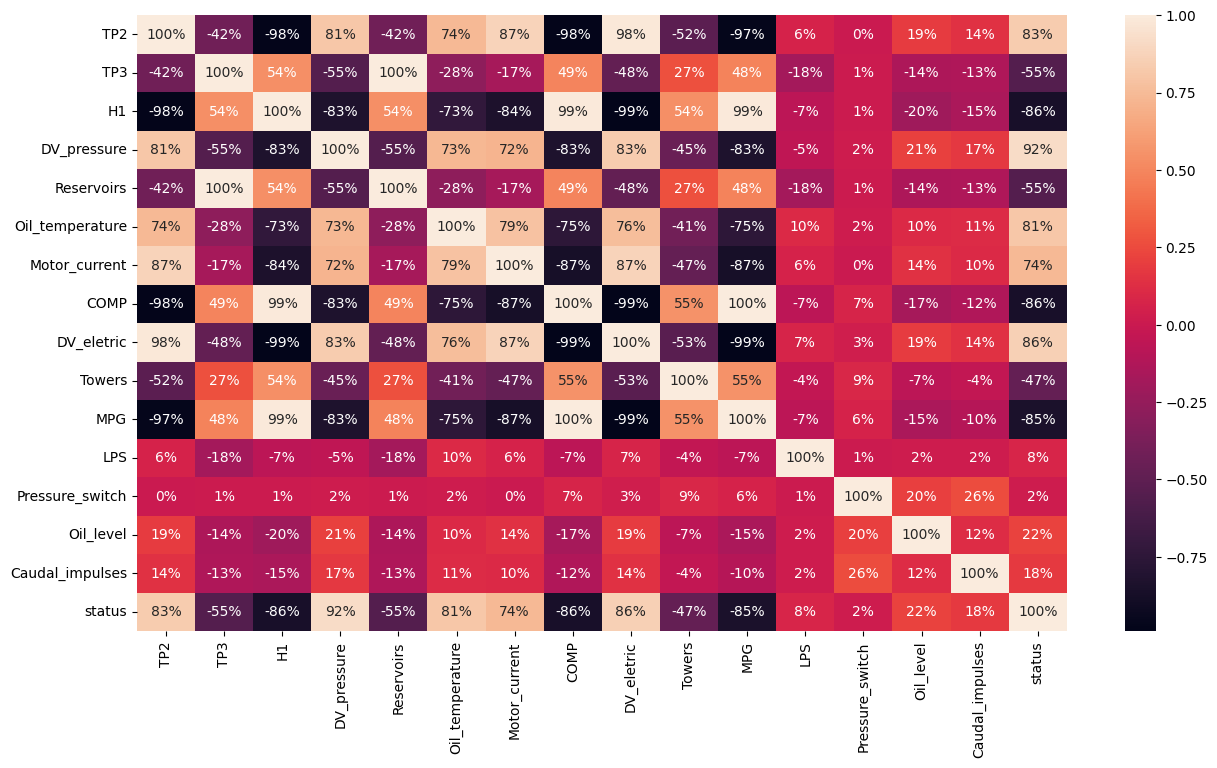

In [57]:
plt.figure(figsize=(15, 8))
sns.heatmap(clean_data.corr().round(2), annot=True, fmt=".0%", linewidths=.0)
plt.show()

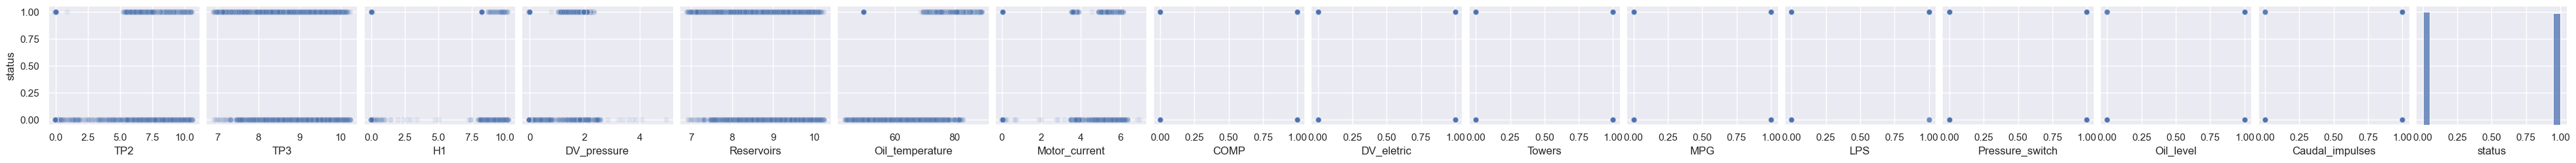

In [65]:
sns.pairplot(clean_data,  y_vars = ['status'] , plot_kws=  {'alpha' : 0.1})

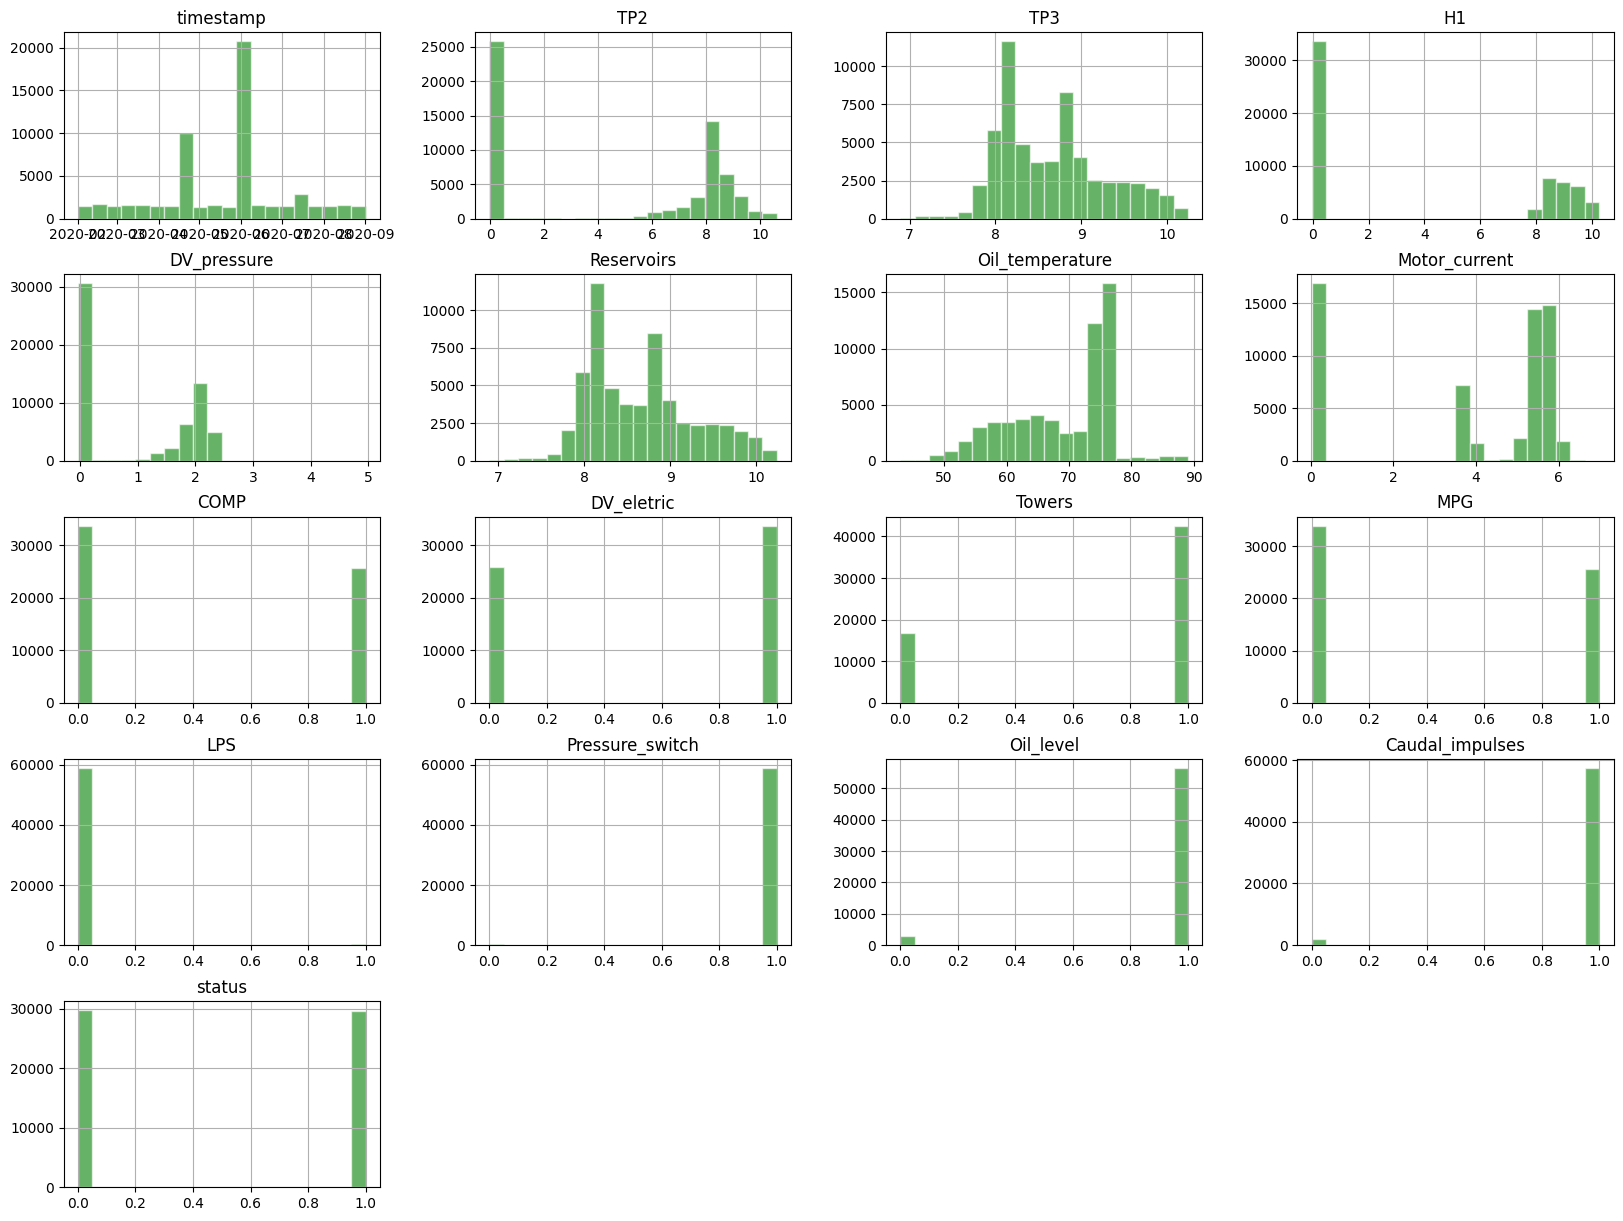

In [61]:
clean_data.hist(figsize=(20,15), ec='white',bins=20, color='green', alpha=0.6)
plt.show()

<Axes: >

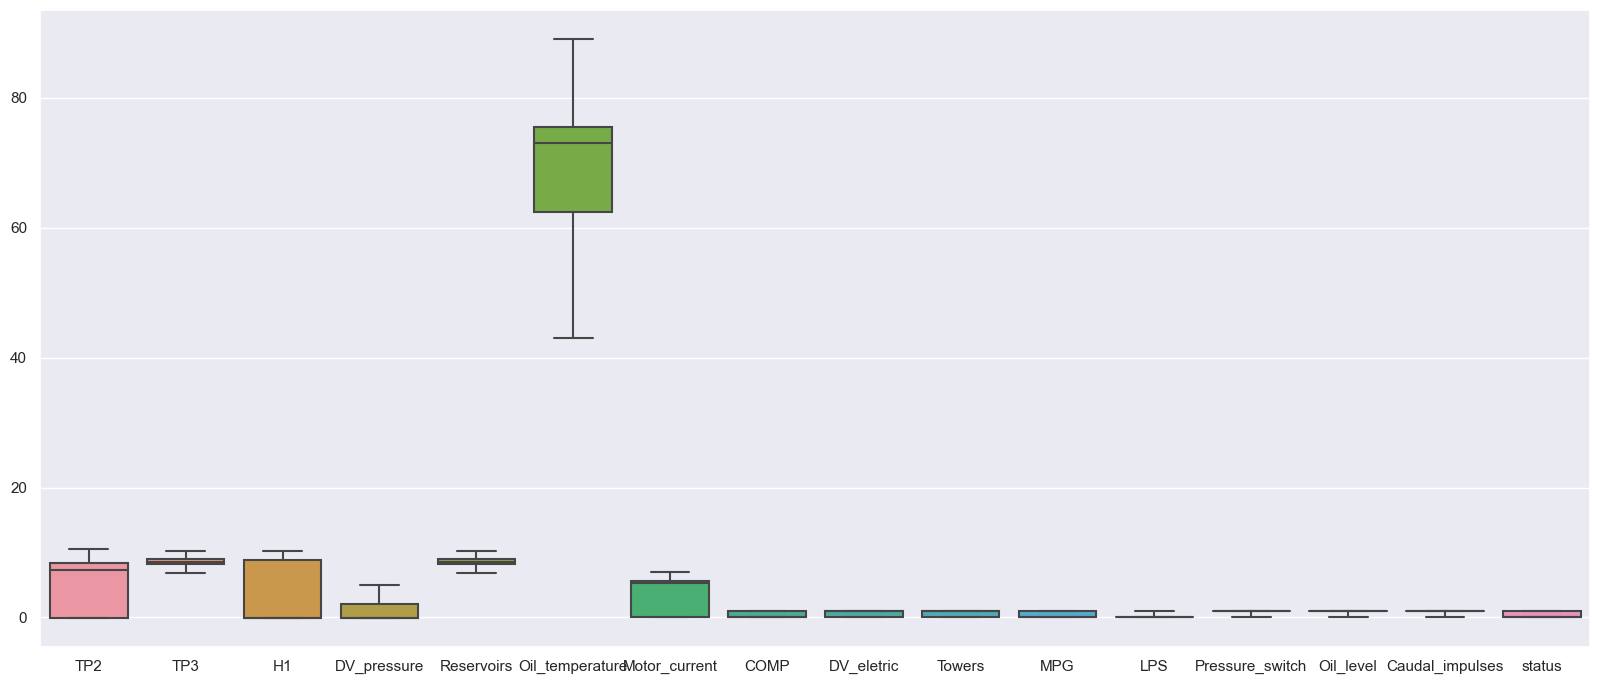

In [62]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.boxplot(clean_data, autorange = True)

We can see that our preprocessing has worked well and there are no outliers in the processed data

In [48]:
clean_data.to_csv('Clean_Data.csv')
np.savez("Clean_Data.npz", clean_data.to_numpy())

# End of preprocessing